# Interpolation -- Phénomène de Runge

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import itertools as it

Dans ce TP, vous allez visualiser le phénomène de Runge selon lequel interpoler une fonction ne conduit pas à approximer cette fonction.

### Question 1
Définissez la fonction $f(x) = \frac{1}{1+25x^2}$ et visualisez la sur l'intervalle $[-1,1]$.

In [7]:
f = lambda x: 1./(1+25*x**2)

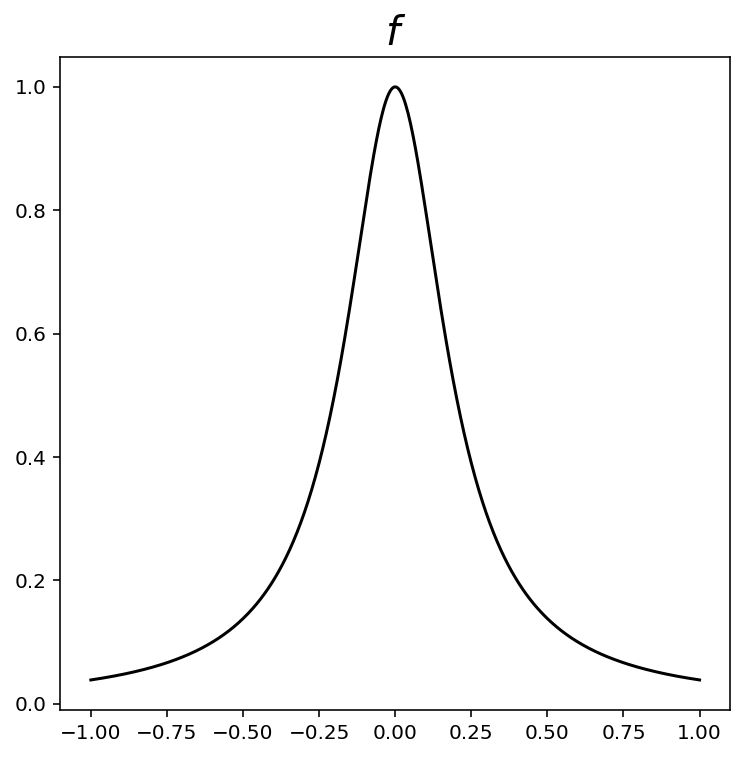

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
xx = np.linspace(-1, 1, 500)
ax.plot(xx, f(xx), 'k')
ax.grid(False)
ax.set_title(r'$f$', fontsize=20)

In [10]:
def InterpDivDiff(x, y, xx):
    """
    Interpolation with the divided differences method
    """
    x, y, xx = np.asanyarray(x, dtype = 'float64'), \
        np.asanyarray(y, dtype = 'float64'), \
        np.asanyarray(xx, dtype = 'float64')
    n = x.size
    if y.size != n:
        print('Error in InterpDivDiff: x and y do not have the same size')
    d = y.copy()
    for i in range(1, n):
        d[i:] = (d[i:] - d[i-1:-1]) / (x[i:] - x[:n-i])
    yy = d[-1]
    for k in range(n-2, -1, -1):
        yy *= xx - x[k]
        yy += d[k]
    return yy if xx.size != 1 else np.asscalar(yy)

### Question 2

En utilisant la méthode des différences divisées, tracez les polynômes interpolateurs de Lagrange de la fonction $f$ en $N$ points équi-répartis sur $[-1,1]$. C'est-à-dire que les points d'interpolation sont
$$ x_i^u = \frac{2i - N+1}{N-1}, \qquad 0\leq i \leq N-1.$$
Vous prendrez différentes valeurs de $N$ et vous tracerez toutes les courbes sur la même figure. 

Que constatez-vous lorsque $N$ devient grand ?

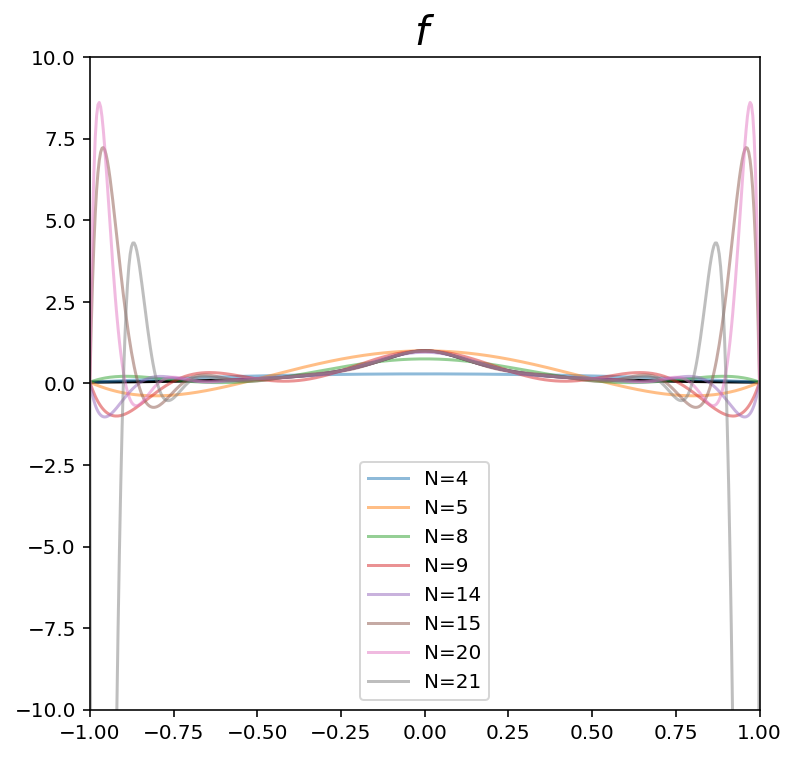

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
xx = np.linspace(-1, 1, 500)
ax.plot(xx, f(xx), 'k')
ax.grid(False)
ax.set_title(r'$f$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-10, 10)
for N in [4, 5, 8, 9, 14, 15, 20, 21]:
    x = np.linspace(-1, 1, N)
    yy = InterpDivDiff(x, f(x), xx)
    ax.plot(xx, yy, alpha = 0.5, label = 'N={0}'.format(N))
ax.legend(loc = 'best')

### Question 3

Recommencez la question 2 en choisissant pour points d'interpolation les zéros des polynômes de Tchebychev, c'est-à-dire
$$ x_i^T = \cos\left( \frac{2j+1}{2N}\pi \right), \qquad 0\leq i \leq N-1.$$
Que constatez-vous ?

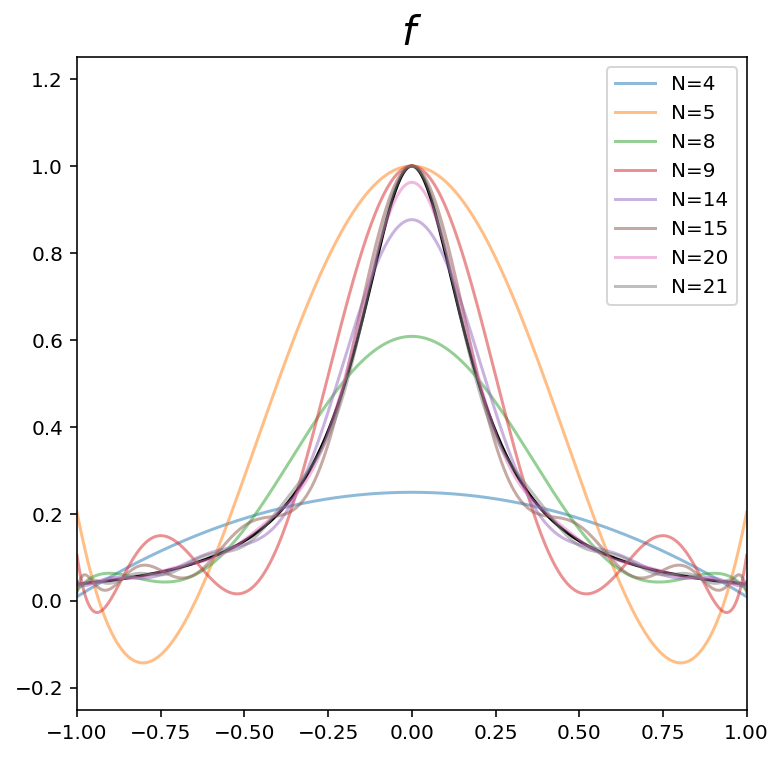

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
xx = np.linspace(-1, 1, 500)
ax.plot(xx, f(xx), 'k')
ax.grid(False)
ax.set_title(r'$f$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-0.25, 1.25)
for N in [4, 5, 8, 9, 14, 15, 20, 21]:
    x = np.cos((2*np.arange(N)+1)/(2*N)*np.pi)
    yy = InterpDivDiff(x, f(x), xx)
    ax.plot(xx, yy, alpha = 0.5, label = 'N={0}'.format(N))
ax.legend(loc = 'best')

### Question 4

Tracez le logarithme de la différence en norme infinie entre la fonction et le polynôme interpolateur de Lagrange pour $N$ variant entre 2 et 45 en prenant comme points d'interpolation les points uniformément répartis. C'est-à-dire que vous tracerez la suite
$$ \varepsilon_N^u = \log_{10} \left(\max_{-1\leq x \leq 1} | f(x) - P_N^u(x)|\right).$$

Complétez la figure en ajoutant la même courbe obtenue avec les zéros des polynômes de Tchebychev comme points d'interpolation. 
$$ \varepsilon_N^T = \log_{10} \left(\max_{-1\leq x \leq 1} | f(x) - P_N^T(x)|\right).$$

Que constatez-vous ?

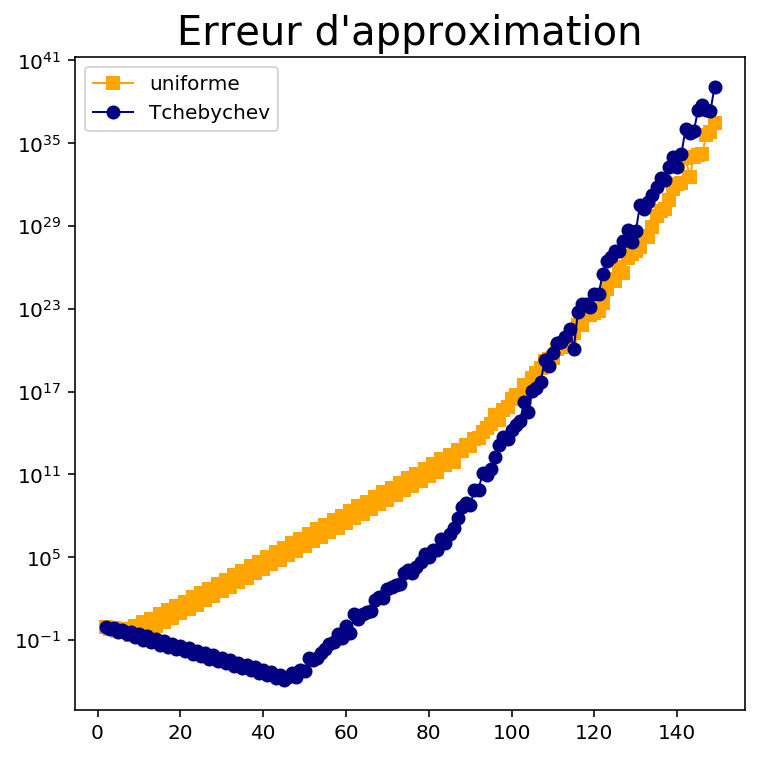

In [17]:
N = np.arange(2, 150)
A = np.zeros(N.shape)
B = np.zeros(N.shape)
xx = np.linspace(-1, 1, 1001)
for i, n in enumerate(N):
    x = np.linspace(-1, 1, n)
    A[i] = np.max(np.abs(InterpDivDiff(x, f(x), xx) - f(xx)))
    x = np.cos((2*np.arange(n)+1)/(2*n)*np.pi)
    B[i] = np.max(np.abs(InterpDivDiff(x, f(x), xx) - f(xx)))

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.semilogy(N, A, color = 'orange', label = 'uniforme', lw = 1, marker = 's')
ax.semilogy(N, B, color = 'navy', label = 'Tchebychev', lw = 1, marker = 'o')
ax.grid(False)
ax.set_title("Erreur d'approximation", fontsize=20)
ax.legend(loc = 'best')